In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('gucci')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('gucci', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
227,227,1225337606990331907,1580978225,2020-02-06 08:37:05,TilliMusic,Gucci Gucci Coo 💥C’mon billieeilish ... this i...,none,0.0,NaN,NaN,...,575,1692,15,NaN,2011-07-04 01:04:11,Catwalkvintage,gucci; vintage; billieeilish; fashion; catwalk...,False,Gucci Gucci Coo C’mon billieeilish ... this is...,coo billieeilish original catwalkvintage str...
927,927,1225363079195766784,1580984298,2020-02-06 10:18:18,DeRodeLoperDH,#GUCCI WOMEN'S #DISNEY X GUCCI GG #SUPREME OLD...,none,0.0,NaN,NaN,...,114,9,10,NaN,2011-08-26 18:21:24,NaN,GUCCI; DISNEY; SUPREME; TENNIS; WOMEN; mode; i...,False,GUCCI WOMEN'S DISNEY X GUCCI GG SUPREME OLD TE...,ns disney x gg supreme old tennis sneaker ss...
1600,1600,1225388437911543809,1580990344,2020-02-06 11:59:04,JClothin,Quality designer scarfs available at jymzbeaut...,none,0.0,NaN,NaN,...,35,14,0,NaN,2019-11-18 13:16:03,NaN,jymzbeautybank; lvscarf; fendiscarf; gucciscar...,False,Quality designer scarfs available at jymzbeaut...,quality designer scarf available jymzbeautyban...
2055,2055,1225402896818196480,1580993792,2020-02-06 12:56:32,Leila1so,RT @gucci: #Kai—from K-pop groups @weareoneEXO...,none,NaN,NaN,NaN,...,113,2597,0,NaN,2019-04-14 05:37:14,gucci; weareoneEXO; superm,Kai; LeonardoFioravanti; GucciFW20; Alessandro...,True,Kai—from K-pop groups weareoneEXO and superm—a...,kai—from pop group weareoneexo superm—and prof...
2133,2133,1225405203458879490,1580994342,2020-02-06 13:05:42,Exolirani1,RT @gucci: #Kai—from K-pop groups @weareoneEXO...,none,NaN,NaN,NaN,...,166,2733,0,NaN,2019-04-14 05:45:08,gucci; weareoneEXO; superm,Kai; LeonardoFioravanti; GucciFW20; Alessandro...,True,Kai—from K-pop groups weareoneEXO and superm—a...,kai—from pop group weareoneexo superm—and prof...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['1017',
 '1955',
 '1980',
 '80',
 'accessory',
 'ace',
 'ad',
 'adida',
 'adidas',
 'again',
 'airjordan',
 'aist',
 'aistsontwitter',
 'akel',
 'akelldn',
 'alessandro',
 'alessandromichele',
 'all',
 'alternative',
 'and',
 'animal',
 'anime',
 'app',
 'apparel',
 'armani',
 'attend',
 'auction',
 'audi',
 'australia',
 'authentic',
 'autumn',
 'available',
 'aw20',
 'backstage',
 'bag',
 'balanciaga',
 'balenciaga',
 'bead',
 'beautiful',
 'beauty',
 'bee',
 'begin',
 'belt',
 'best',
 'bijoux',
 'bio',
 'black',
 'blog',
 'blogger',
 'bloom',
 'blouse',
 'blue',
 'bodysuit',
 'boho',
 'bottom',
 'boutique',
 'boy',
 'bracelet',
 'brand',
 'break',
 'bridal',
 'bride',
 'bridesmaid',
 'bring',
 'brooch',
 'burberry',
 'business',
 'butterfly',
 'buy',
 'cake',
 'california',
 'call',
 'calvinklein',
 'camel',
 'canva',
 'capcom',
 'car',
 'carousel',
 'cat',
 'chanel',
 'check',
 'chic',
 'chicago',
 'childsplayclothing',
 'choker',
 'classic',
 'clip',
 'clothes',
 'clothing',
 'c

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

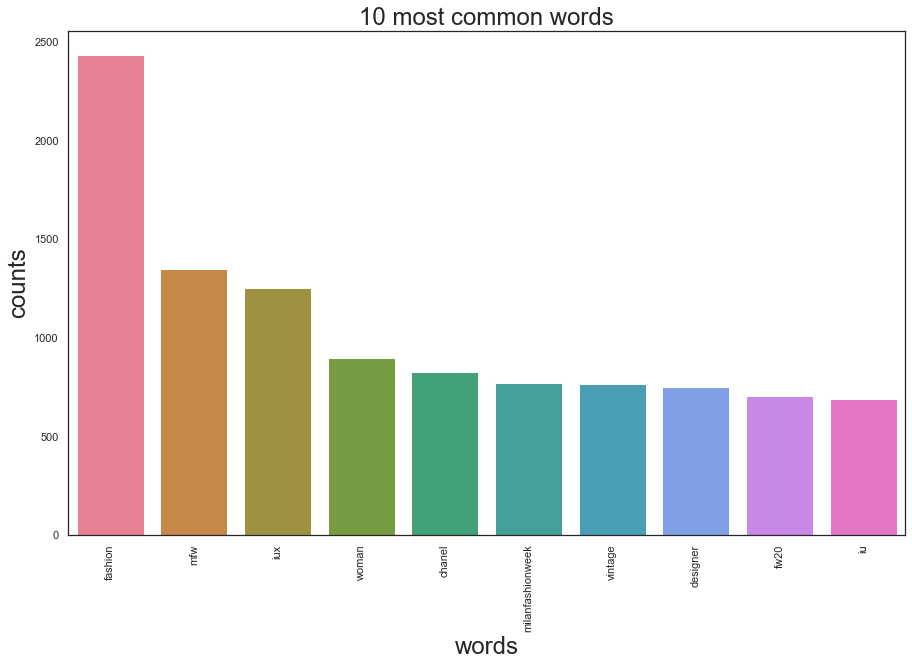

In [8]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -261925.09666860467
Perplexity:  116.41615769178918
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [13]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
milanfashionweek iu iux do leejieun fly kiss 이지은 fashion sneaker bag luxury mfw style clothes shoe purse shop shopping piece

Topic #1:
fashion mfw dior chanel fendi show fashionista gold givenchy ysl style rhoa kjl etruscan california rhobh vintage victorian donnakaran designer

Topic #2:
mfw fashion fw20 theritual woman show fall akelldn style milan finale mfy instagram look offwhite trapstar instafashion fashionweek design louisvuitton

Topic #3:
leather bag iux fashionblogger black red available shoulder color fashion online sandal sylvie exact platform style prada get now winter

Topic #4:
fashion jacket shoe designer handbag crochet louisvuitton vintage trend top etsy clothing mens brand hermes coat chanel woman airjordan auction


In [14]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [15]:
pyLDAvis.save_html(LDAvis_prepared, './gucci'+ str(number_of_topics) +'.html')

We look at the probabilities to belong to each topic for each document and add them to the dataframe.

In [16]:
df = pd.DataFrame(columns=['topic','word'])

In [17]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [19]:
df.to_csv('topic_word_prabal_gucci.csv')